In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
data= od.download(
 "https://www.kaggle.com/datasets/tolgadincer/labeled-chest-xray-images")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ndfj
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/tolgadincer/labeled-chest-xray-images


100%|██████████| 1.17G/1.17G [00:19<00:00, 65.3MB/s]


In [ ]:
import os
import shutil

In [ ]:
def extract_images(source_folder, target_folder, num_images):
    # Ensure the target folder exists
    os.makedirs(target_folder, exist_ok=True)

    # List all files in the source folder
    all_files = os.listdir(source_folder)

    # Filter for image files if necessary (assuming JPEG files here)
    all_images = [file for file in all_files if file.endswith('.jpeg')]

    # Check if there are enough images
    if len(all_images) < num_images:
        raise ValueError("Not enough images available in the folder")

    # Copy the specified number of images to the target folder
    for image in all_images[:num_images]:
        shutil.copy(os.path.join(source_folder, image), os.path.join(target_folder, image))

# Usage example
source_folder = '/content/labeled-chest-xray-images/chest_xray/train/PNEUMONIA'
target_folder = '/content/labeled-chest-xray-images/chest_xray/train/PNEUMONIA1'
num_images = 1310
extract_images(source_folder, target_folder, num_images)

In [ ]:
import os
import shutil

def clear_folder(folder_path):
    # Check all items in the folder
    for item in os.listdir(folder_path):
        item_path = os.path.join(folder_path, item)
        try:
            if os.path.isfile(item_path) or os.path.islink(item_path):
                os.unlink(item_path)  # Remove file or link
                print(f"Deleted file: {item_path}")
            elif os.path.isdir(item_path):
                shutil.rmtree(item_path)  # Remove directory and all its contents
                print(f"Deleted directory: {item_path}")
        except Exception as e:
            print(f"Failed to delete {item_path}. Reason: {e}")

# Specify the folder path to clear
folder_path = '/content/labeled-chest-xray-images/chest_xray/train/PNEUMONIA'  # Make sure this is the correct path
clear_folder(folder_path)

Deleted file: /content/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-4342499-0002.jpeg
Deleted file: /content/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-1630215-0002.jpeg
Deleted file: /content/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/VIRUS-8498464-0002.jpeg
Deleted file: /content/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-3067831-0002.jpeg
Deleted file: /content/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/VIRUS-7811141-0001.jpeg
Deleted file: /content/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/VIRUS-2136769-0001.jpeg
Deleted file: /content/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-8600331-0001.jpeg
Deleted file: /content/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-6295192-0002.jpeg
Deleted file: /content/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-5285130-0004.jpeg
Deleted file: /content/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/VIRUS-

Training Set Images:


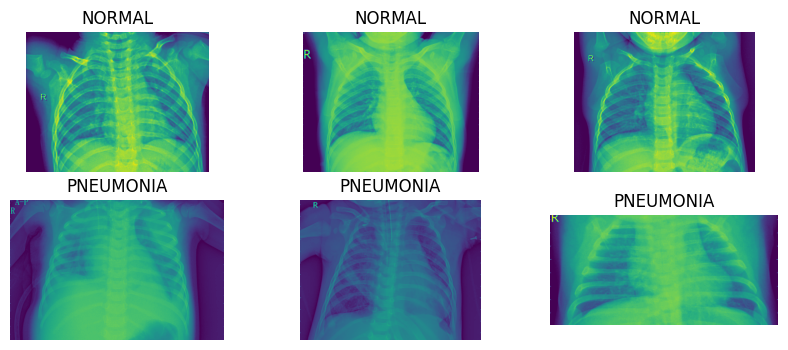

Testing Set Images:


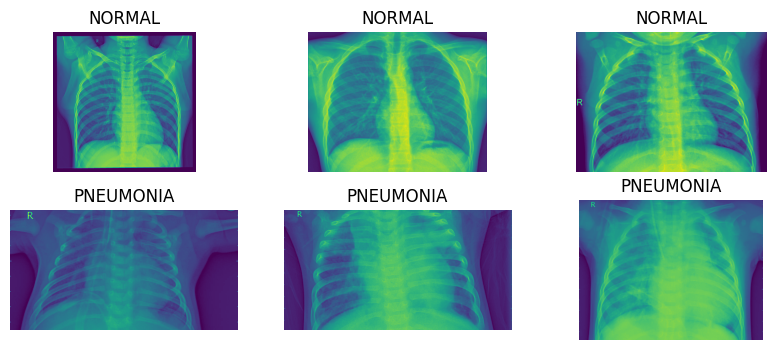

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def show_images(categories, base_dir, num_images=3):
    plt.figure(figsize=(10, 4))
    for i, category in enumerate(categories):
        # Construct the path to the category folder
        category_path = os.path.join(base_dir, category)

        # Get all image files in the folder
        images = [os.path.join(category_path, img) for img in os.listdir(category_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Display the first few images
        for j in range(num_images):
            if j < len(images):
                img = Image.open(images[j])
                plt.subplot(len(categories), num_images, i * num_images + j + 1)
                #plt.imshow(img, cmap='gray')
                plt.imshow(img)
                plt.title(f'{category}')
                plt.axis('off')
    plt.show()

# Base directories for training and testing sets
train_dir = '/content/labeled-chest-xray-images/chest_xray/train'
test_dir = '/content/labeled-chest-xray-images/chest_xray/test'

# Categories within the folders
categories = ['NORMAL', 'PNEUMONIA']

# Display images from the training set
print("Training Set Images:")
show_images(categories, train_dir)

# Display images from the testing set
print("Testing Set Images:")
show_images(categories, test_dir)


Counted 1349 images in NORMAL
Counted 1310 images in PNEUMONIA


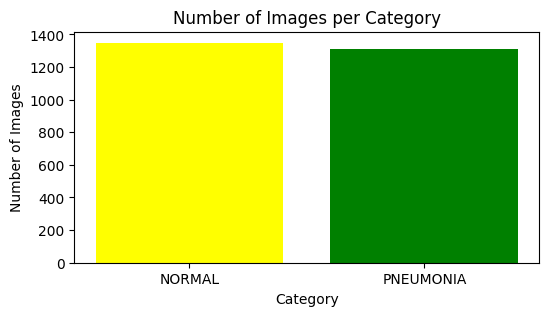

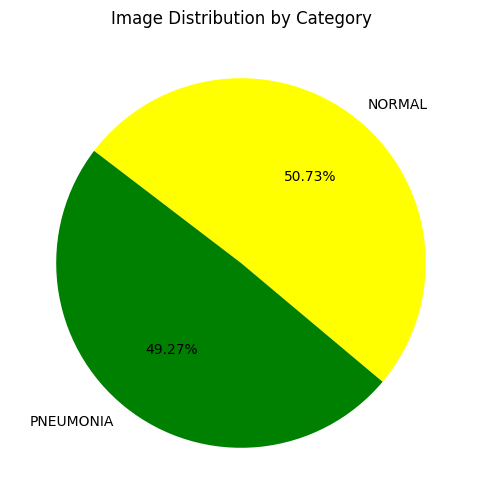

In [ ]:
import os
import matplotlib.pyplot as plt
def count_images(categories, base_dir):
    counts = {}
    for category in categories:
        # Path to the category folder
        category_path = os.path.join(base_dir, category)
        if not os.path.exists(category_path):
            print(f"Category path does not exist: {category_path}")
            continue
        # Counting the image files
        images = [name for name in os.listdir(category_path) if name.lower().endswith(('.png', '.jpg', '.jpeg'))]
        images_count = len(images)
        print(f"Counted {images_count} images in {category}")  # Debug output
        counts[category] = images_count
    return counts

def plot_data(counts):
    if not counts:
        print("No data to plot.")
        return
    # Bar Graph
    plt.figure(figsize=(6, 3))
    plt.bar(counts.keys(), counts.values(), color=['yellow', 'green'])
    plt.xlabel('Category')
    plt.ylabel('Number of Images')
    plt.title('Number of Images per Category')
    plt.xticks(list(counts.keys()))
    plt.show()

    # Pie Chart
    plt.figure(figsize=(6, 6))
    plt.pie(counts.values(), labels=counts.keys(), autopct='%2.2f%%', startangle=1400, colors=['yellow', 'green'])
    plt.title('Image Distribution by Category')
    plt.show()

# Base directory for the dataset
base_dir = '/content/labeled-chest-xray-images/chest_xray/train'

# Categories within the folder
categories = ['NORMAL', 'PNEUMONIA']

# Count images
image_counts = count_images(categories, base_dir)

# Plot the data
plot_data(image_counts)


In [ ]:
!pip install fiftyone


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.0/670.0 kB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 kB 13.1 MB/s eta 0:00:00
  Installing build depend

In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz

In [ ]:
def load_and_visualize_images(base_dir, categories):
    # Create a FiftyOne dataset
    dataset = fo.Dataset()

    # Load images into the dataset
    for category in categories:
        category_path = os.path.join(base_dir, category)
        images = [os.path.join(category_path, img) for img in os.listdir(category_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Add images to dataset
        for img_path in images:
            sample = fo.Sample(filepath=img_path, label=category)
            dataset.add_sample(sample)

    # Visualize the dataset
    session = fo.launch_app(dataset)
    session.wait()

In [ ]:
# Directories for the dataset
train_dir = '/content/labeled-chest-xray-images/chest_xray/train'
#test_dir = '/content/labeled-chest-xray-images/chest_xray/test'

# Categories within the folders
categories = ['NORMAL', 'PNEUMONIA']

# Load and display images from the training set
print("Training Set Images:")
load_and_visualize_images(train_dir, categories)

# Load and display images from the testing set
print("Testing Set Images:")
load_and_visualize_images(test_dir, categories)


Training Set Images:


Notebook sessions cannot wait


Testing Set Images:


Notebook sessions cannot wait


In [ ]:
import fiftyone as fo

def load_and_visualize_images(base_dir, categories):
    dataset_name = "Chest X-Ray Images"

    # Delete the dataset if it already exists
    if dataset_name in fo.list_datasets():
        fo.delete_dataset(dataset_name)

    # Create a new FiftyOne dataset
    dataset = fo.Dataset(name=dataset_name)

    # Load images into the dataset
    for category in categories:
        category_path = os.path.join(base_dir, category)
        images = [os.path.join(category_path, img) for img in os.listdir(category_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Add images to dataset
        for img_path in images:
            sample = fo.Sample(filepath=img_path, label=category)
            dataset.add_sample(sample)

    # Visualize the dataset
    session = fo.launch_app(dataset)
    session.wait()


# Training

In [ ]:

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resNet50 import resNet50
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt




In [ ]:

IMAGE_SIZE = [224, 224]

train_path = r'/content/labeled-chest-xray-images/chest_xray/train'
valid_path = r'/content/labeled-chest-xray-images/chest_xray/test'

vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
  layer.trainable = False



In [ ]:
folders = glob('/content/labeled-chest-xray-images/chest_xray/train/*')

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

model.summary()

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=["accuracy"]
)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/labeled-chest-xray-images/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/labeled-chest-xray-images/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 2659 images belonging to 3 classes.
Found 624 images belonging to 2 classes.


In [ ]:
x_sample, y_sample = next(iter(training_set))
print(f"Feature batch shape: {x_sample.shape}")
print(f"Label batch shape: {y_sample.shape}")


Feature batch shape: (32, 224, 224, 3)
Label batch shape: (32, 3)


In [ ]:


try:
    history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=1,  # Reduce to 1 for debugging
    steps_per_epoch=10,  # Reduce number of steps to check quicker
    validation_steps=10
)
except Exception as e:
    print(f"An error occurred: {e}"
    )


In [ ]:
import sys
print(sys.version)
import tensorflow as tf
print(tf.__version__)


3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2.15.0


In [ ]:
import tensorflow as tf

from keras.models import load_model

model.save('brain.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
print("done")

done


In [ ]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
model = load_model('brain.h5')
print(model)
img = image.load_img('740.jpg', target_size=(224,224))
x = image.img_to_array(img)
x= np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

if classes[0][0]>=0.5:
    print("You are not effected")
else:
    print("You are effected")

1/1 [==============================] - 1s 1s/step
You are not effected


In [ ]:
import tensorflow as tf

# Load the model from the H5 file
model = tf.keras.models.load_model('brain.h5')
print("Model loaded successfully.")


Model loaded successfully.


In [ ]:
print('Input shape:', model.input_shape)
print('Output shape:', model.output_shape)


Input shape: (None, 224, 224, 3)
Output shape: (None, 2)


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

# Setup the data generator for the test set
test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(224, 224),  # Ensure this matches the input size expected by the model
    batch_size=32,           # Adjust based on your system's configuration
    class_mode='categorical',  # This will automatically one-hot encode your labels
    shuffle=False     )

# Load your model if not already loaded
model = tf.keras.models.load_model('brain.h5')

# Evaluate the model on the test data
results = model.evaluate(test_generator)

# Print out loss and accuracy
print("Loss:", results[0])
print("Accuracy:", results[1])


Found 624 images belonging to 2 classes.
20/20 [==============================] - 11s 551ms/step - loss: 0.2030 - accuracy: 0.9375
Loss: 0.20298577845096588
Accuracy: 0.9375


In [ ]:
x_sample, y_sample = next(test_generator)
print("Shape of the labels:", y_sample.shape)  # Should output something like (32, 2) for 32 samples per batch
model.summary()


Shape of the labels: (32, 2)
Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  

In [ ]:
import numpy as np

# Fetch a batch of images and labels
x_batch, y_batch = next(test_generator)
predictions = model.predict(x_batch)

# Check predicted values
print("Predictions:", predictions)

# Compare predictions with true labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_batch, axis=1)
print("Predicted classes:", predicted_classes)
print("True classes:", true_classes)


1/1 [==============================] - 0s 201ms/step
Predictions: [[9.9984574e-01 1.5422155e-04]
 [9.9974114e-01 2.5881550e-04]
 [9.9802554e-01 1.9745175e-03]
 [9.4871026e-01 5.1289696e-02]
 [9.9805897e-01 1.9409928e-03]
 [9.9998963e-01 1.0328356e-05]
 [9.9775970e-01 2.2403109e-03]
 [9.8715937e-01 1.2840615e-02]
 [9.9912077e-01 8.7924005e-04]
 [9.8275673e-01 1.7243262e-02]
 [2.3391552e-02 9.7660851e-01]
 [9.9938917e-01 6.1085401e-04]
 [9.9996257e-01 3.7486720e-05]
 [9.9999726e-01 2.7925751e-06]
 [7.7742338e-01 2.2257662e-01]
 [9.9849451e-01 1.5055105e-03]
 [7.8499192e-01 2.1500811e-01]
 [9.9118477e-01 8.8152410e-03]
 [9.9998581e-01 1.4135094e-05]
 [9.9956554e-01 4.3441134e-04]
 [9.9891222e-01 1.0878236e-03]
 [8.7947291e-01 1.2052711e-01]
 [9.9582040e-01 4.1796039e-03]
 [9.9968910e-01 3.1086942e-04]
 [6.8732321e-01 3.1267682e-01]
 [9.9999177e-01 8.2674787e-06]
 [9.9789608e-01 2.1039296e-03]
 [9.9782759e-01 2.1724186e-03]
 [1.7260427e-02 9.8273957e-01]
 [9.7879761e-01 2.1202400e-02]
 [1.

<Axes: >

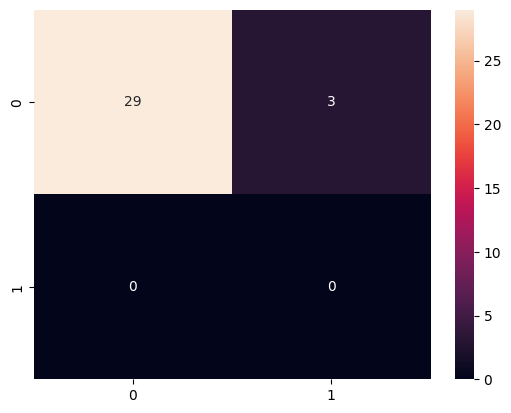

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(cm, annot=True, fmt="d")


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Predict classes
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes
true_classes = test_generator.classes

# Classification report
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)


20/20 [==============================] - 7s 313ms/step
              precision    recall  f1-score   support

      NORMAL       0.93      0.91      0.92       234
   PNEUMONIA       0.94      0.96      0.95       390

    accuracy                           0.94       624
   macro avg       0.94      0.93      0.93       624
weighted avg       0.94      0.94      0.94       624



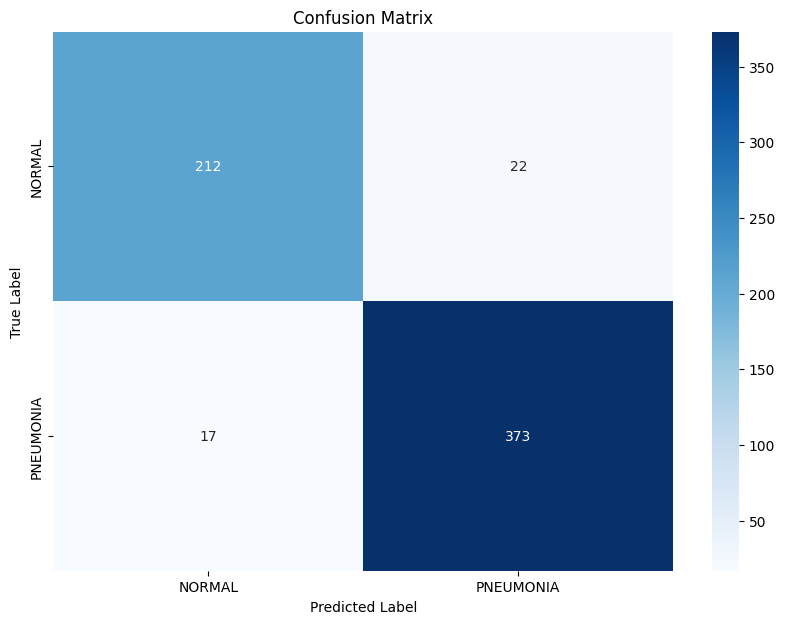

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


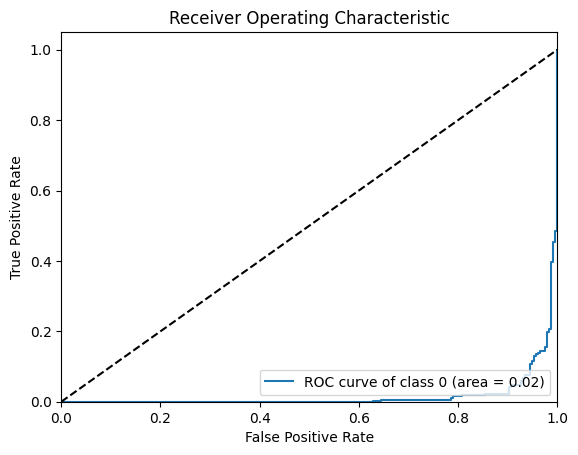

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for ROC curve
y_bin = label_binarize(true_classes, classes=[0,1])  # Adjust classes if more than binary
n_classes = y_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


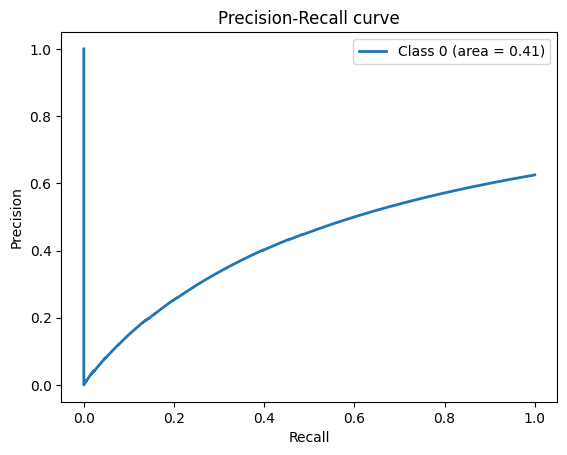

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_bin[:, i], predictions[:, i])
    average_precision[i] = average_precision_score(y_bin[:, i], predictions[:, i])

# Plot Precision-Recall curve
plt.figure()
for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (area = {average_precision[i]:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall curve")
plt.legend(loc="best")
plt.show()


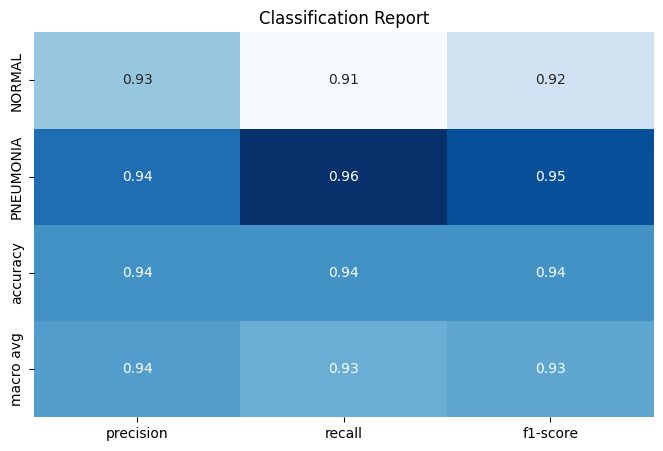

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys(), output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:-1, :].drop(['support'], axis=1), annot=True, cmap='Blues', cbar=False)
plt.title('Classification Report')
plt.show()
